# Exploratory data analysis and data preprocessing

In [1]:
#Importing relevant libraries and packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
#Ignoring warning messages 
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
#Uploading the Mammographic Mass Dataset from the UCI repository
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data'

#Specifying the column names
column_names = ["BI-RADS assessment", "age", "mass_shape","mass_margin","mass_density","severity_class"]

#Reading the dataset into a pandas DataFrame
df = pd.read_csv(url, header=None, names=column_names)

#Viewing the top 5 rows of the dataset
df.head(5)

,BI-RADS assessment,age,mass_shape,mass_margin,mass_density,severity_class
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [3]:
#Using df.info() function to determine the type of data in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS assessment    961 non-null object
age                   961 non-null object
mass_shape            961 non-null object
mass_margin           961 non-null object
mass_density          961 non-null object
severity_class        961 non-null int64
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [4]:
#Null values are shwon as '?', replacing all null values with an empty space
df.replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df.head(5)

,BI-RADS assessment,age,mass_shape,mass_margin,mass_density,severity_class
0,5,67,3,5,3,1
1,4,43,1,1,,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,,1


In [5]:
#Converting all values from 'object' data type to a numeric value either integer or float
df = df.apply(pd.to_numeric, errors ='ignore')

In [6]:
#Checking that the data type has been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS assessment    959 non-null float64
age                   956 non-null float64
mass_shape            930 non-null float64
mass_margin           913 non-null float64
mass_density          885 non-null float64
severity_class        961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [7]:
#Using .describe function to get an overview of the descriptive statistics of all of the attibutes and target class values
df.describe()

,BI-RADS assessment,age,mass_shape,mass_margin,mass_density,severity_class
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [8]:
#getting the mode values for all of the attributes and the target class.
df.mode()

,BI-RADS assessment,age,mass_shape,mass_margin,mass_density,severity_class
0,4.0,59.0,4.0,1.0,3.0,0


In [9]:
#The BI-RADS assessment feature is non-predictive and will be dropped.
df = df.drop(columns=["BI-RADS assessment"])
df.head()

,age,mass_shape,mass_margin,mass_density,severity_class
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


In [10]:
#Finding the number of missing values in each column
df.isnull().sum() 

age                5
mass_shape        31
mass_margin       48
mass_density      76
severity_class     0
dtype: int64

In [11]:
#Age is a continuous ordinal variable, null values will be replaced by mean values
df.age.fillna(df.age.mean(), inplace=True) 

In [12]:
#Null values from the age feature column have been imputed
df.isnull().sum()

age                0
mass_shape        31
mass_margin       48
mass_density      76
severity_class     0
dtype: int64

In [13]:
#Dropping all rows with remaining null values
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 960
Data columns (total 5 columns):
age               836 non-null float64
mass_shape        836 non-null float64
mass_margin       836 non-null float64
mass_density      836 non-null float64
severity_class    836 non-null int64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [15]:
#Checking that the DataFrame does not have any null values
df.isnull().sum()

age               0
mass_shape        0
mass_margin       0
mass_density      0
severity_class    0
dtype: int64

In [16]:
#Getting dummy variables for the attributes that have nominal numerical values
df2 = pd.get_dummies(data=df, columns=['mass_shape', 'mass_margin'])
df2.head()

,age,mass_density,severity_class,mass_shape_1.0,mass_shape_2.0,mass_shape_3.0,mass_shape_4.0,mass_margin_1.0,mass_margin_2.0,mass_margin_3.0,mass_margin_4.0,mass_margin_5.0
0,67.0,3.0,1,0,0,1,0,0,0,0,0,1
2,58.0,3.0,1,0,0,0,1,0,0,0,0,1
3,28.0,3.0,0,1,0,0,0,1,0,0,0,0
8,57.0,3.0,1,1,0,0,0,0,0,0,0,1
10,76.0,3.0,1,1,0,0,0,0,0,0,1,0


In [17]:
#Changingthe order of the columns
df2 = df2[['age', 'mass_density', 'mass_shape_1.0',
       'mass_shape_2.0', 'mass_shape_3.0', 'mass_shape_4.0', 'mass_margin_1.0',
       'mass_margin_2.0', 'mass_margin_3.0', 'mass_margin_4.0',
       'mass_margin_5.0','severity_class']]

In [18]:
df2.head()

,age,mass_density,mass_shape_1.0,mass_shape_2.0,mass_shape_3.0,mass_shape_4.0,mass_margin_1.0,mass_margin_2.0,mass_margin_3.0,mass_margin_4.0,mass_margin_5.0,severity_class
0,67.0,3.0,0,0,1,0,0,0,0,0,1,1
2,58.0,3.0,0,0,0,1,0,0,0,0,1,1
3,28.0,3.0,1,0,0,0,1,0,0,0,0,0
8,57.0,3.0,1,0,0,0,0,0,0,0,1,1
10,76.0,3.0,1,0,0,0,0,0,0,1,0,1


# Visualising the distribution of the BI-RADS features included in the dataset 

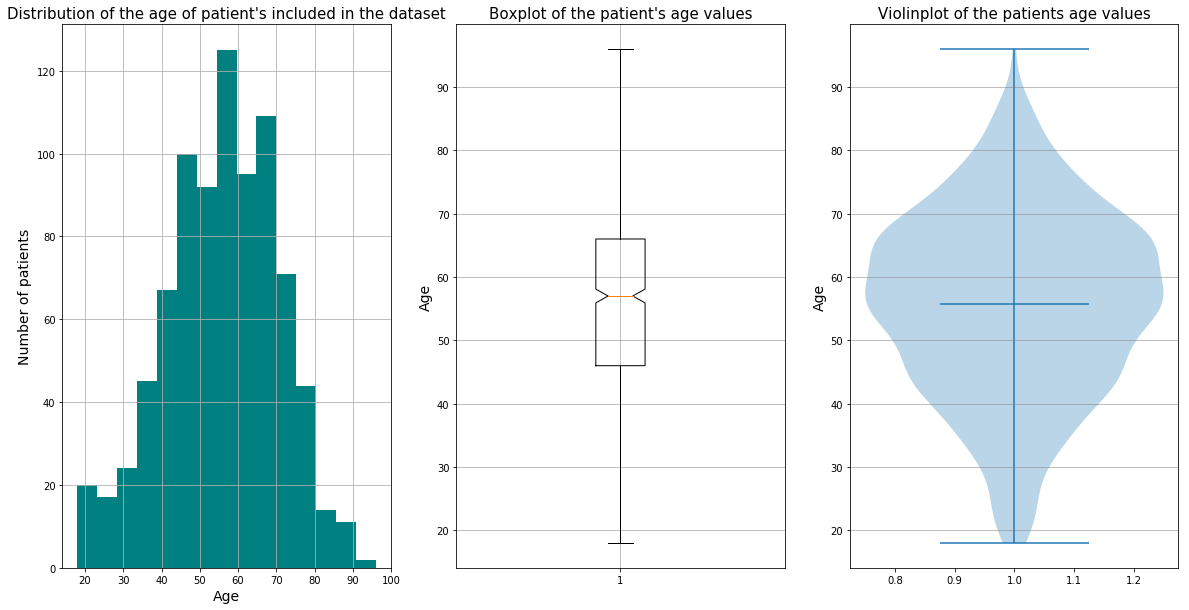

In [19]:
#Visualising the distribution of the age of the patients using histogram, boxplot and violinplot
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.hist(df.age,histtype='bar',bins=15, color = 'teal') 
plt.grid(True)
plt.xlabel('Age',fontsize = 14)
plt.ylabel('Number of patients', fontsize=14)
plt.title("Distribution of the age of patient's included in the dataset",fontsize=15)

plt.subplot(1,3,2)
plt.boxplot(df.age,notch = True)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel('Age',fontsize=14)
plt.title("Boxplot of the patient's age values",fontsize =15)

plt.subplot(1,3,3)
plt.violinplot(df.age, showmeans=True, showextrema=True)
plt.grid(b=None,color='grey', linestyle='-', linewidth=0.5,axis = 'y')
plt.ylabel('Age',fontsize=14)
plt.title("Violinplot of the patients age values",fontsize=15)

plt.show()


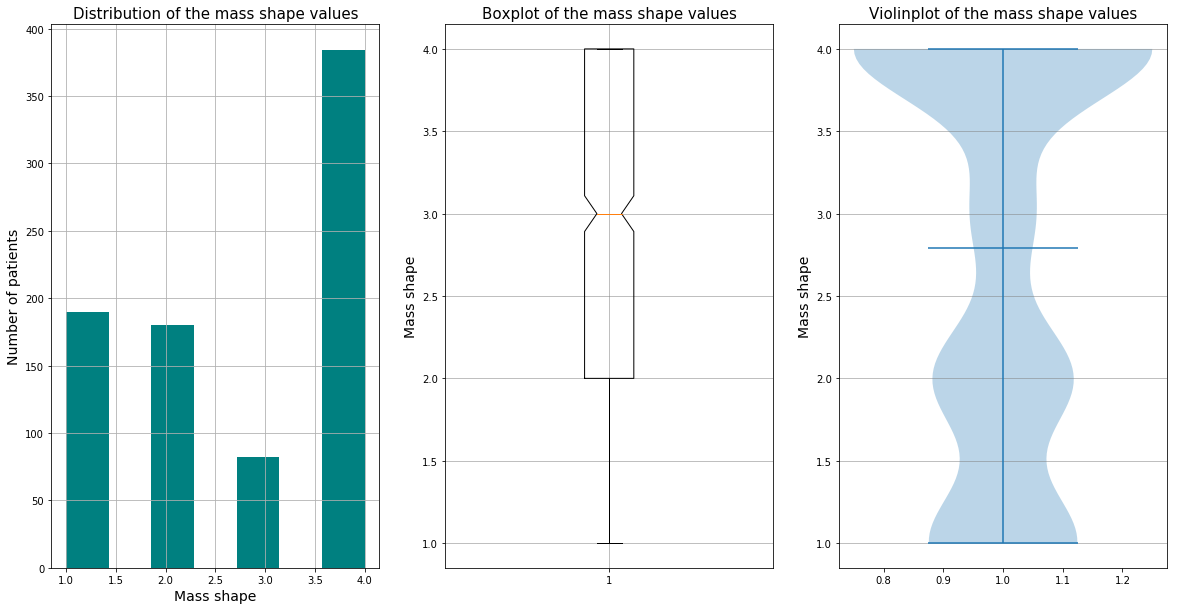

In [20]:
#Visualising the distribution of the mass shape values using histogram, boxplot and violinplot
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.hist(df.mass_shape,histtype='bar',bins=7, color = 'teal') 
plt.grid(True)
plt.xlabel('Mass shape',fontsize = 14)
plt.ylabel('Number of patients', fontsize=14)
plt.title("Distribution of the mass shape values",fontsize=15)


plt.subplot(1,3,2)
plt.boxplot(df.mass_shape,notch = True)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel('Mass shape',fontsize=14)
plt.title("Boxplot of the mass shape values",fontsize =15)

plt.subplot(1,3,3)
plt.violinplot(df.mass_shape, showmeans=True, showextrema=True)
plt.grid(b=None,color='grey', linestyle='-', linewidth=0.5,axis = 'y')
plt.ylabel('Mass shape',fontsize=14)
plt.title("Violinplot of the mass shape values",fontsize=15)

plt.show()

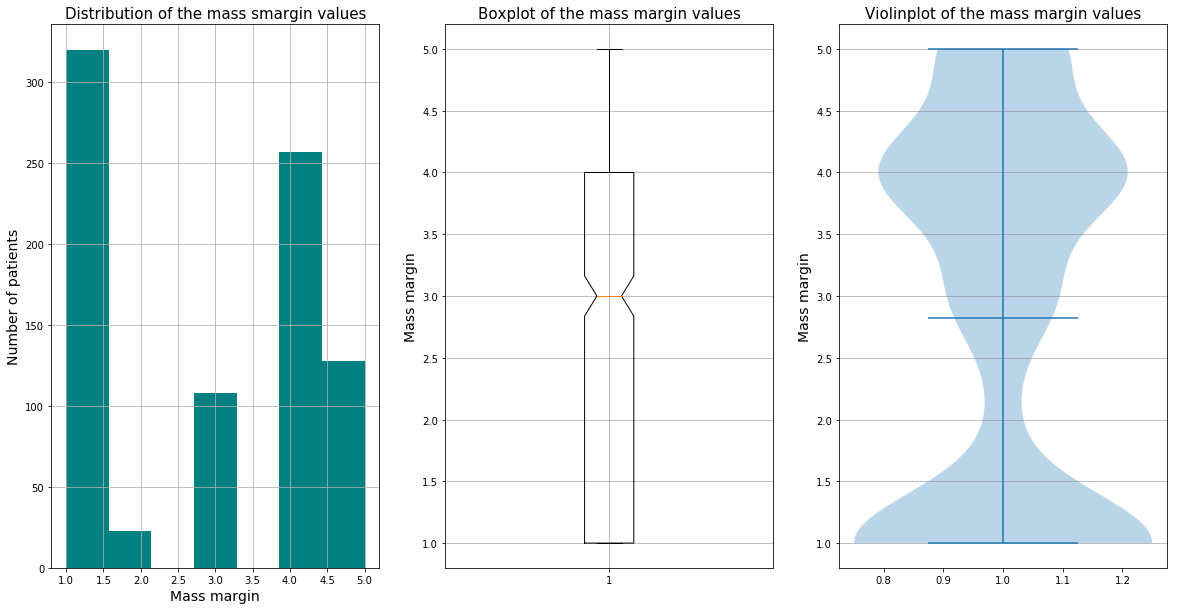

In [21]:
#Visualising the distribution of the mass margin values using histogram, boxplot and violinplot
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.hist(df.mass_margin,histtype='bar',bins=7, color = 'teal') 
plt.grid(True)
plt.xlabel('Mass margin',fontsize = 14)
plt.ylabel('Number of patients', fontsize=14)
plt.title("Distribution of the mass smargin values",fontsize=15)


plt.subplot(1,3,2)
plt.boxplot(df.mass_margin,notch = True)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel('Mass margin',fontsize=14)
plt.title("Boxplot of the mass margin values",fontsize =15)

plt.subplot(1,3,3)
plt.violinplot(df.mass_margin, showmeans=True, showextrema=True)
plt.grid(b=None,color='grey', linestyle='-', linewidth=0.5,axis = 'y')
plt.ylabel('Mass margin',fontsize=14)
plt.title("Violinplot of the mass margin values",fontsize=15)

plt.show()

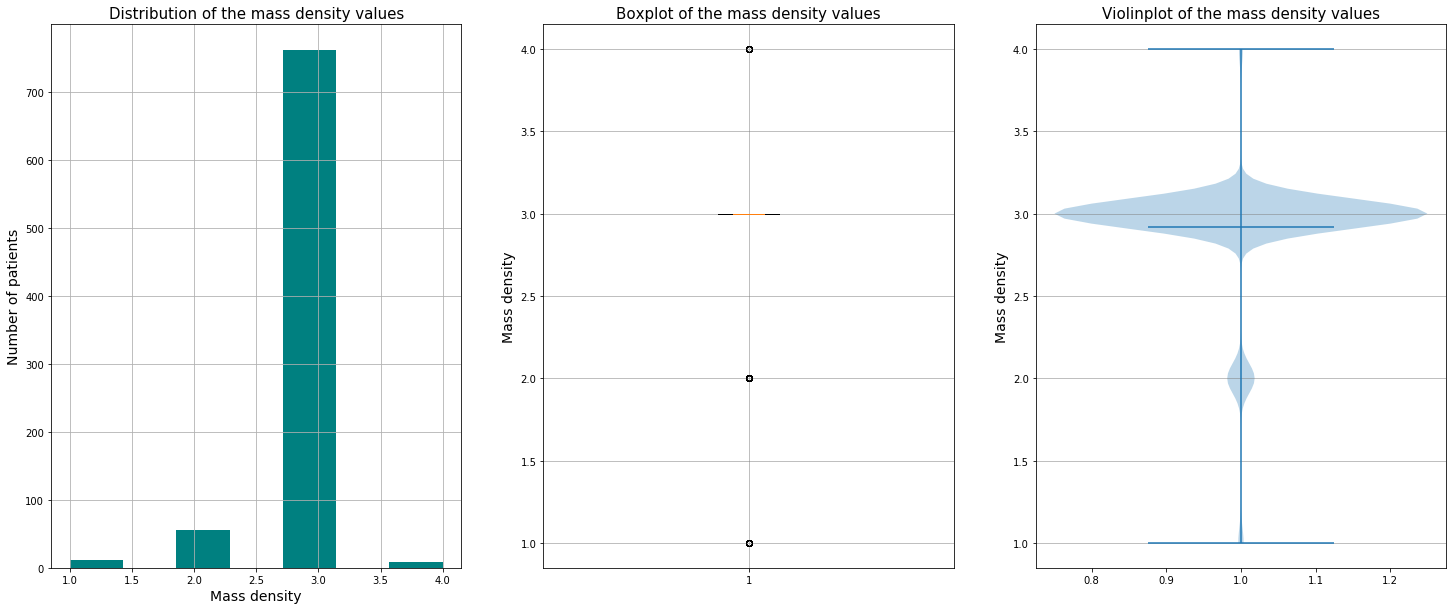

In [22]:
#Visualising the distribution of the mass density values using histogram, boxplot and violinplot
plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
plt.hist(df.mass_density,histtype='bar',bins=7, color = 'teal') 
plt.grid(True)
plt.xlabel('Mass density',fontsize = 14)
plt.ylabel('Number of patients', fontsize=14)
plt.title("Distribution of the mass density values",fontsize=15)


plt.subplot(1,3,2)
plt.boxplot(df.mass_density,notch = True)
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.ylabel('Mass density',fontsize=14)
plt.title("Boxplot of the mass density values",fontsize =15)

plt.subplot(1,3,3)
plt.violinplot(df.mass_density, showmeans=True, showextrema=True)
plt.grid(b=None,color='grey', linestyle='-', linewidth=0.5,axis = 'y')
plt.ylabel('Mass density',fontsize=14)
plt.title("Violinplot of the mass density values",fontsize=15)

plt.show()

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
mass_shape        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
mass_margin       AxesSubplot(0.672059,0.657941;0.227941x0.222059)
mass_density         AxesSubplot(0.125,0.391471;0.227941x0.222059)
severity_class    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

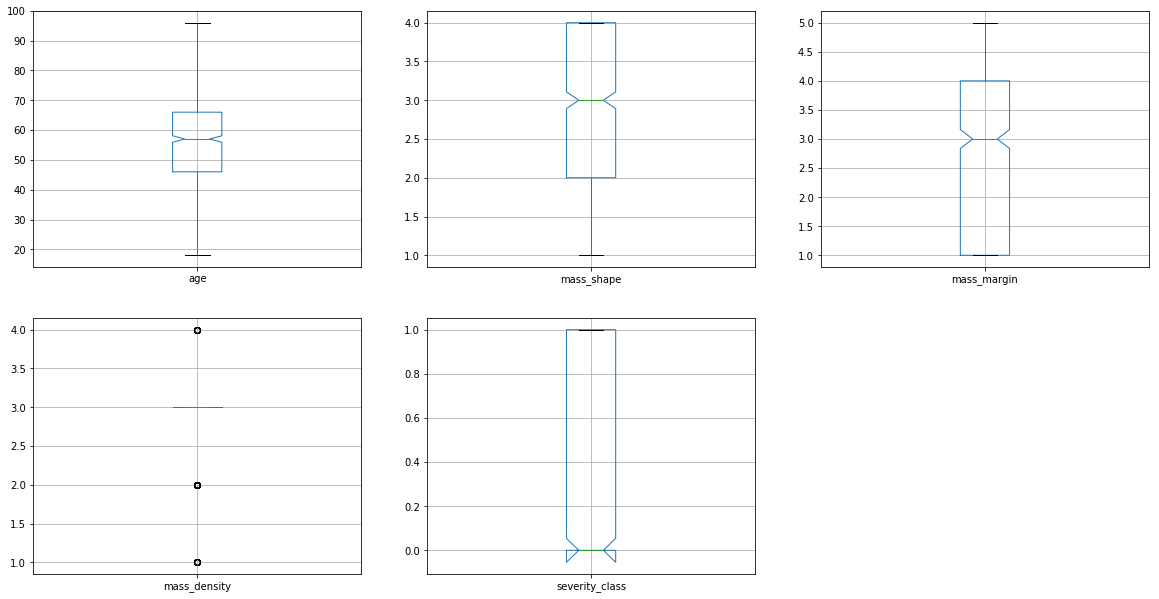

In [23]:
#Visualising the boxplots of all of the features
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,16), grid = True, notch = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C50E8E7C18>,
      dtype=object)

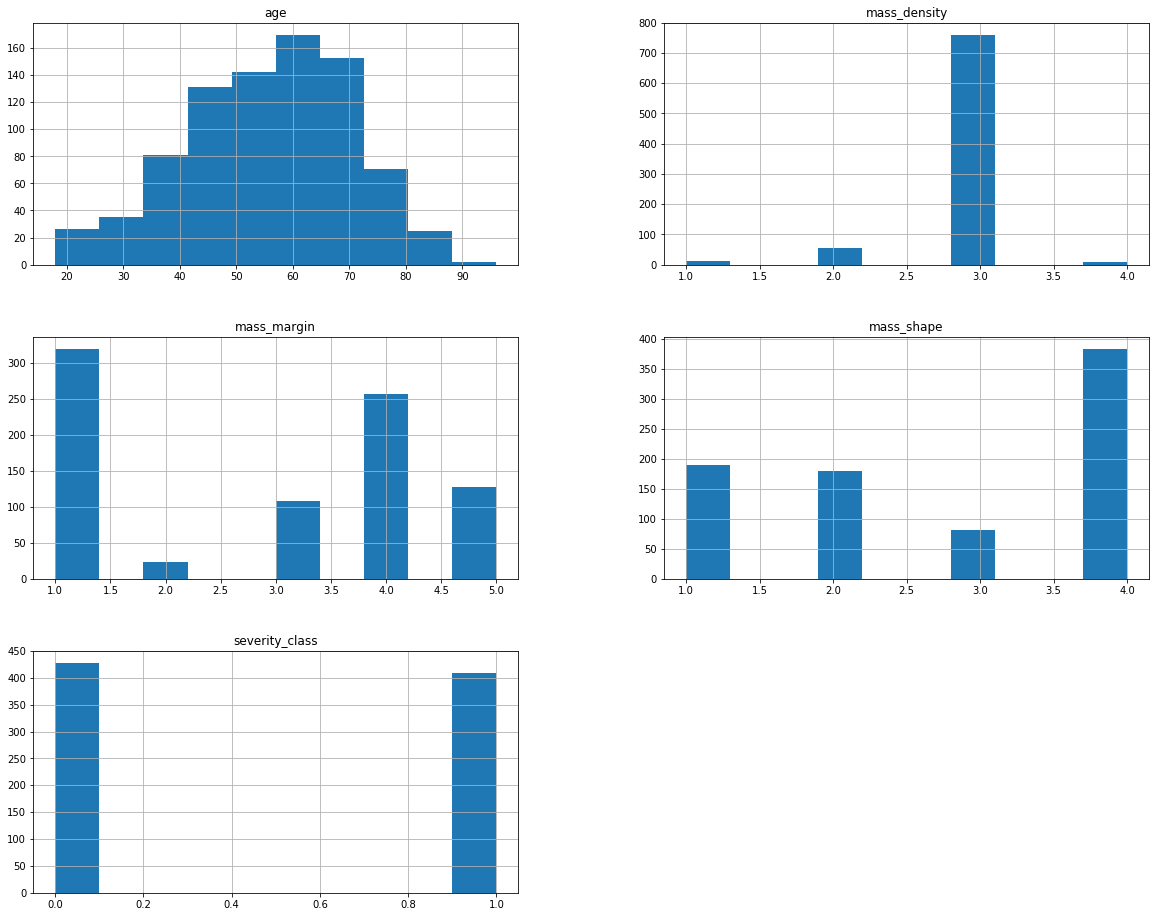

In [24]:
#Visalising the distribution of all of the attributes using histograms
df.hist(figsize=(20,16),bins = 10 )

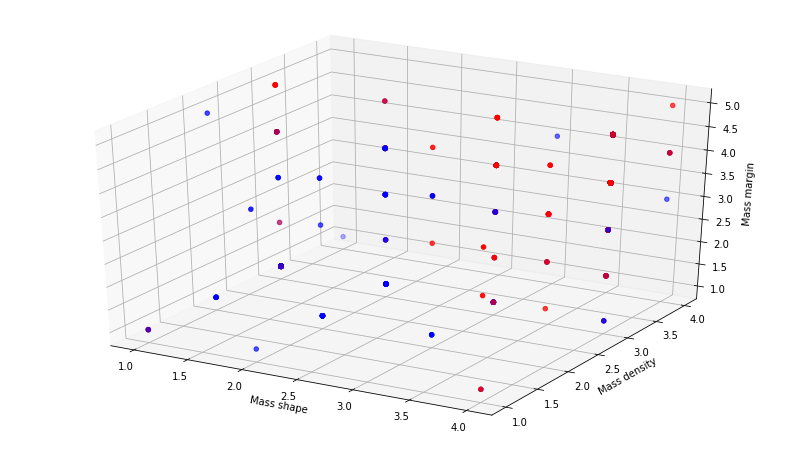

In [25]:
#Plotting the mass margin, mass shape and mass density features in a 3D space

feature1 = df['mass_shape'].values
feature2 = df['mass_density'].values 
feature3 = df['mass_margin'].values

df['severity_class']=df['severity_class'].astype('str')

c = df['severity_class'].values
df['severity_class']= df['severity_class'].astype('int')
c[c=='0'] = 'b' #benign
c[c=='1'] = 'r' #malignant

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c)
ax.set_xlabel('Mass shape')
ax.set_ylabel('Mass density')
ax.set_zlabel('Mass margin')

plt.show()

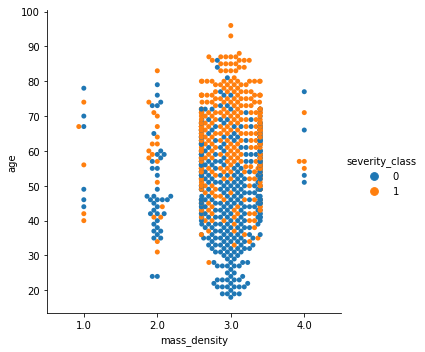

In [26]:
#Plotting age and mass density in a swarmplot 
sns.catplot(x= "mass_density", y="age", hue = "severity_class", kind= "swarm", data=df)

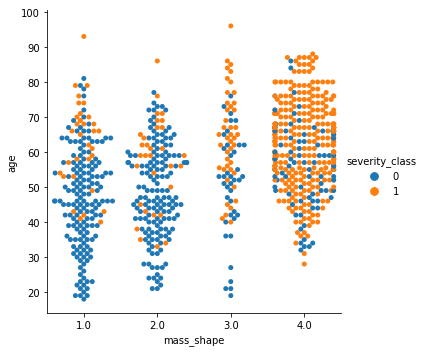

In [27]:
#Plotting age and mass mass in a swarmplot 
sns.catplot(x= "mass_shape", y="age", hue = "severity_class", kind= "swarm", data=df)

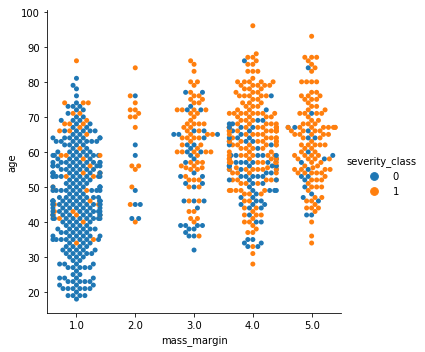

In [28]:
#Plotting age and mass margin in a swarmplot 
sns.catplot(x= "mass_margin", y="age", hue = "severity_class", kind= "swarm", data=df)

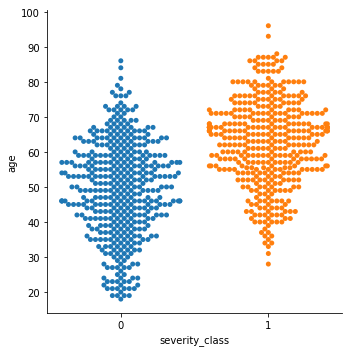

In [29]:
import seaborn as sns
sns.catplot(x= "severity_class", y="age", hue = "severity_class", kind= "swarm", data=df)

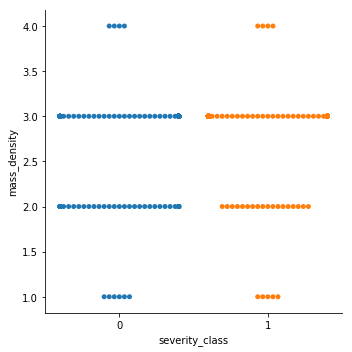

In [30]:
#Plotting severity class  and mass density in a swarmplot 
sns.catplot(x= "severity_class", y="mass_density", hue = "severity_class", kind= "swarm", data=df);

In [31]:
#Plotting the correlation values betveen all of the feature values
df2.corr()

,age,mass_density,mass_shape_1.0,mass_shape_2.0,mass_shape_3.0,mass_shape_4.0,mass_margin_1.0,mass_margin_2.0,mass_margin_3.0,mass_margin_4.0,mass_margin_5.0,severity_class
age,1.000000,0.052300,-0.245834,-0.211050,0.043183,0.355031,-0.437622,0.046628,0.102079,0.223493,0.188069,0.453679
mass_density,0.052300,1.000000,-0.017075,-0.082659,-0.013047,0.090324,-0.128179,0.019370,0.031049,0.048350,0.073346,0.069577
mass_shape_1.0,-0.245834,-0.017075,1.000000,-0.284083,-0.178847,-0.499870,0.553604,-0.056317,-0.174844,-0.299457,-0.175108,-0.346773
mass_shape_2.0,-0.211050,-0.082659,-0.284083,1.000000,-0.172745,-0.482815,0.341868,0.000851,-0.088964,-0.134556,-0.206564,-0.330958
mass_shape_3.0,0.043183,-0.013047,-0.178847,-0.172745,1.000000,-0.303961,-0.077672,0.092054,0.088810,0.024333,-0.050872,0.023983
mass_shape_4.0,0.355031,0.090324,-0.499870,-0.482815,-0.303961,1.000000,-0.701158,-0.008285,0.167405,0.348281,0.347991,0.550274
mass_margin_1.0,-0.437622,-0.128179,0.553604,0.341868,-0.077672,-0.701158,1.000000,-0.132455,-0.303317,-0.524659,-0.334841,-0.581795
mass_margin_2.0,0.046628,0.019370,-0.056317,0.000851,0.092054,-0.008285,-0.132455,1.000000,-0.064784,-0.112059,-0.071517,0.055230
mass_margin_3.0,0.102079,0.031049,-0.174844,-0.088964,0.088810,0.167405,-0.303317,-0.064784,1.000000,-0.256610,-0.163770,0.116238
mass_margin_4.0,0.223493,0.048350,-0.299457,-0.134556,0.024333,0.348281,-0.524659,-0.112059,-0.256610,1.000000,-0.283280,0.277846


Text(0.5, 1.0, 'Correlation Matrix for mammographic masses dataset')

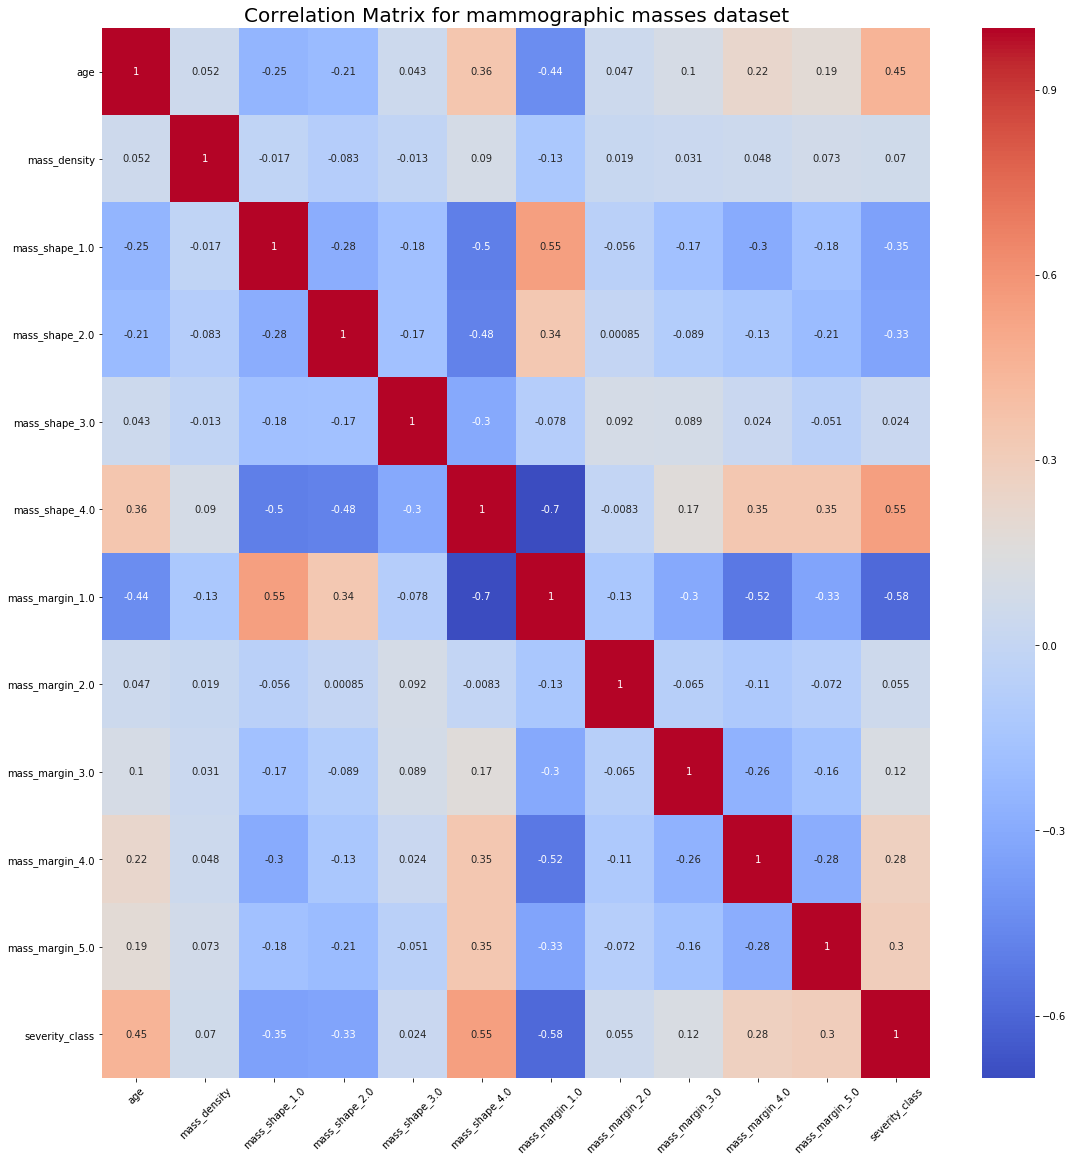

In [32]:
#Ploting the correlation values in a heatmap
fig, ax = plt.subplots(figsize=(16,16))  
corr1 = df2.corr()
ax = sns.heatmap(corr1, annot = True, cmap="coolwarm")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.title('Correlation Matrix for mammographic masses dataset',fontsize = 20)

In [33]:
# Creating the input variable for the classifiers
X = df2.drop('severity_class',axis = 1) # selecting the feature colums, only excluding the target coulumn 'class'
y = df2['severity_class']

In [34]:
#Determining the class distribution
print ("number of all feature vectors:", y.size)
print ("number of malignant feature vectors: ", np.sum(y))
print ("number of benign feature vectors: ",  y.size-np.sum(y))

number of all feature vectors: 836
number of malignant feature vectors:  408
number of benign feature vectors:  428


In [35]:
#Determining the class distribution as a percentage
benign_data_raw = y[y == 0]
malign_data_raw = y[y == 1]

percentage = len(malign_data_raw)/float(len(benign_data_raw))
sample_size = int(percentage*len(benign_data_raw))


print ("\nPercentage of benign tumours            :", len(benign_data_raw) / float(len(y)))
print ("Percentage of malign tumours            :", len(malign_data_raw) / float(len(y)))
print ("\nTotal number of data in our new dataset :", len(y))


Percentage of benign tumours            : 0.5119617224880383
Percentage of malign tumours            : 0.4880382775119617

Total number of data in our new dataset : 836


In [36]:
#Spliting the data into training and testing sets, 80% of data will be used for training and 20% of data is kept aside 
#for testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [37]:
#Using StandardScaler to centre feature columns to have a mean of 0 and a standard deviation of 1 
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Feature extraction with Principal Component Analysis

In [38]:
#Calculating the variance explained by the number of different feature components
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([2.73852302e-01, 1.29842744e-01, 1.15062126e-01, 1.13078767e-01,
       1.00861150e-01, 8.78810911e-02, 8.64798500e-02, 6.67247316e-02,
       2.62172382e-02, 3.49234605e-33, 3.46770749e-34])

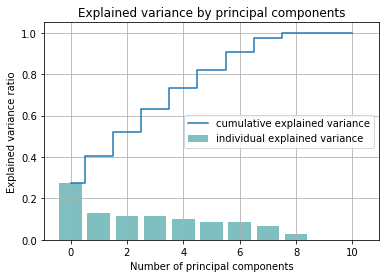

In [39]:
#Plotting the variance explained ratio and the cumulative variance
plt.bar(np.arange(11), pca.explained_variance_ratio_, alpha=0.5, color = 'teal', align='center',label='individual explained variance')
plt.step(np.arange(11), np.cumsum(pca.explained_variance_ratio_), where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Number of principal components')
plt.grid(True)
plt.legend(loc='best')
plt.title('Explained variance by principal components')
plt.show()

In [40]:
#Determining the effect that different number of PCA components have on the SVC model accuracy
def plotvector(X_train, y_train, X_test, y_test):
    results = []
    
    for i in range(1, 11):
        pipe_svc = Pipeline([('scl', StandardScaler()),
                             ('pca', PCA(n_components=i)),
                             ('clf', SVC(probability=True, verbose = False))])
        
        pipe_svc.fit(X_train, y_train)
        results.append([i, pipe_svc.score(X_test, y_test)])
 
    return np.array(results)

PCA_accuracy =  plotvector(X_train, y_train, X_test, y_test)
PCA_accuracy

array([[ 1.        ,  0.76190476],
       [ 2.        ,  0.74404762],
       [ 3.        ,  0.76190476],
       [ 4.        ,  0.75595238],
       [ 5.        ,  0.75      ],
       [ 6.        ,  0.75595238],
       [ 7.        ,  0.75595238],
       [ 8.        ,  0.73809524],
       [ 9.        ,  0.74404762],
       [10.        ,  0.74404762]])

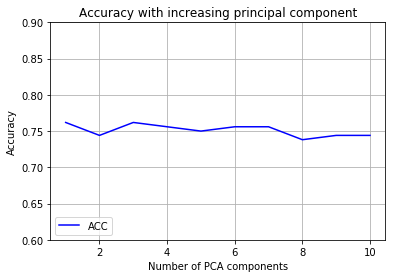

In [41]:
#Plotting the accuracy of the model with different number of PCA components
plt.plot(PCA_accuracy[:,0], PCA_accuracy[:,1], color='b', label='ACC')
plt.legend(loc=3)
plt.ylim(0.6, 0.9)
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('Number of PCA components')
plt.title("Accuracy with increasing principal component")
plt.show()

In [42]:
#Determining the effect that different number of PCA components have on the MLP model accuracy
def plotvector(X_train, y_train, X_test, y_test):
    results_MLP_PCA = []
    
    for i in range(1, 6):
        pipe_MLP_PCA = Pipeline([('scl', StandardScaler()),
                                 ('pca', PCA(n_components=i)),
                                 ('clf', MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=250, 
                                                        alpha=1e-4,activation='logistic', verbose=10, tol=1e-4, random_state=1))])
        
         
        pipe_MLP_PCA.fit(X_train, y_train)
        results_MLP_PCA.append([i, pipe_MLP_PCA.score(X_test, y_test)])
 
    return np.array(results_MLP_PCA)
PCA_accuracy_MLP =  plotvector(X_train, y_train, X_test, y_test)
PCA_accuracy_MLP

Iteration 1, loss = 0.72677677
Iteration 2, loss = 0.69470876
Iteration 3, loss = 0.70207167
Iteration 4, loss = 0.69617379
Iteration 5, loss = 0.69148412
Iteration 6, loss = 0.69403683
Iteration 7, loss = 0.69372479
Iteration 8, loss = 0.69056120
Iteration 9, loss = 0.68860125
Iteration 10, loss = 0.68861079
Iteration 11, loss = 0.68667898
Iteration 12, loss = 0.68480664
Iteration 13, loss = 0.68326677
Iteration 14, loss = 0.68028649
Iteration 15, loss = 0.67699992
Iteration 16, loss = 0.67583269
Iteration 17, loss = 0.66958157
Iteration 18, loss = 0.66395647
Iteration 19, loss = 0.65688170
Iteration 20, loss = 0.64690219
Iteration 21, loss = 0.63486008
Iteration 22, loss = 0.62026422
Iteration 23, loss = 0.60346096
Iteration 24, loss = 0.58250328
Iteration 25, loss = 0.56210400
Iteration 26, loss = 0.53904706
Iteration 27, loss = 0.51648691
Iteration 28, loss = 0.49439919
Iteration 29, loss = 0.47620257
Iteration 30, loss = 0.46175220
Iteration 31, loss = 0.45043955
Iteration 32, los

Iteration 44, loss = 0.42303868
Iteration 45, loss = 0.42145547
Iteration 46, loss = 0.42274137
Iteration 47, loss = 0.42508420
Iteration 48, loss = 0.42271825
Iteration 49, loss = 0.42334873
Iteration 50, loss = 0.42309362
Iteration 51, loss = 0.42316870
Iteration 52, loss = 0.42221677
Iteration 53, loss = 0.42222816
Iteration 54, loss = 0.42087926
Iteration 55, loss = 0.42222863
Iteration 56, loss = 0.42213916
Iteration 57, loss = 0.42201182
Iteration 58, loss = 0.42166148
Iteration 59, loss = 0.42107291
Iteration 60, loss = 0.42212745
Iteration 61, loss = 0.42084073
Iteration 62, loss = 0.42238604
Iteration 63, loss = 0.42280328
Iteration 64, loss = 0.42221390
Iteration 65, loss = 0.42141348
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


array([[1.        , 0.75      ],
       [2.        , 0.75595238],
       [3.        , 0.75595238],
       [4.        , 0.74404762],
       [5.        , 0.73809524]])

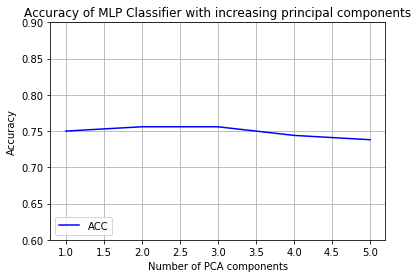

In [43]:
#Plotting the accuracy of the model with different number of PCA components
plt.plot(PCA_accuracy_MLP[:,0], PCA_accuracy_MLP[:,1], color='b', label='ACC')
plt.legend(loc=3)
plt.ylim(0.6, 0.9)
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('Number of PCA components')
plt.title("Accuracy of MLP Classifier with increasing principal components")
plt.show()

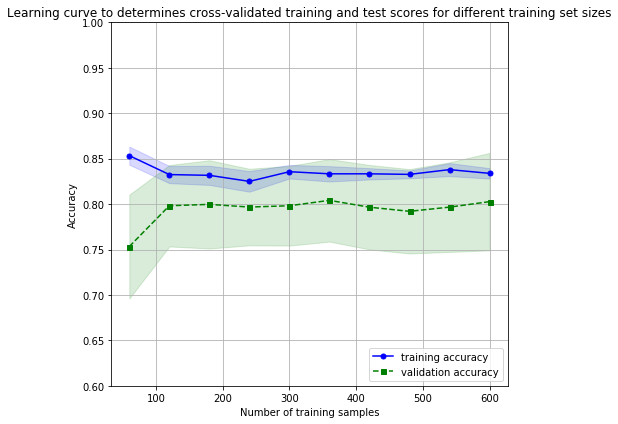

In [44]:
#learning curve to help determine if the SVC model is likely to overfit or underfit
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(probability=True, verbose = False))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_svc,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples',fontsize =10)
plt.ylabel('Accuracy',fontsize =10)
plt.legend(loc='lower right')
plt.ylim([0.6, 1])
plt.title('Learning curve to determines cross-validated training and test scores for different training set sizes', fontsize = 12)
plt.tight_layout()
plt.show()

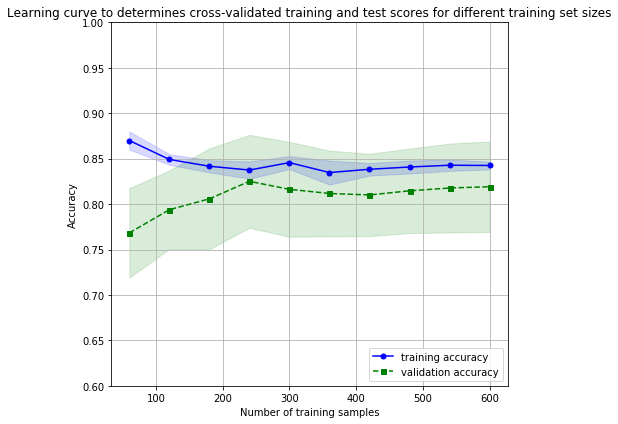

In [45]:
#learning curve to help determine if the MLP model is likely to overfit or underfit
pipe_mlp= Pipeline([('scl',StandardScaler()),
                     ('clf',MLPClassifier(max_iter=150, tol=1e-4, random_state=1))])

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_mlp,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples',fontsize =10)
plt.ylabel('Accuracy',fontsize =10)
plt.legend(loc='lower right')
plt.ylim([0.6, 1])
plt.title('Learning curve to determines cross-validated training and test scores for different training set sizes', fontsize = 12)
plt.tight_layout()
plt.show()

# Feature selection

 1) age                            0.426027
 2) mass_margin_1.0                0.208843
 3) mass_shape_4.0                 0.148439
 4) mass_shape_2.0                 0.058534
 5) mass_margin_5.0                0.033515
 6) mass_shape_1.0                 0.031595
 7) mass_density                   0.031479
 8) mass_margin_4.0                0.025168
 9) mass_shape_3.0                 0.013925
10) mass_margin_3.0                0.012786
11) mass_margin_2.0                0.009689


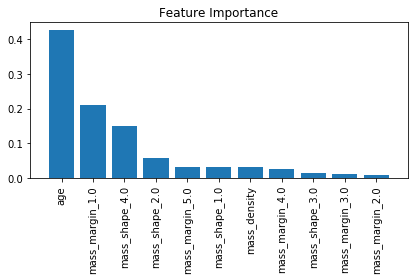

In [46]:
#Selecting the most impportant features to be used for building the models
from sklearn.ensemble import RandomForestClassifier

feat_labels = df2.columns[:-1]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [47]:
#Redefining the features to be used for building the model, only including the 5 most important featres
X=df2[['age','mass_margin_1.0', 'mass_shape_4.0','mass_shape_2.0','mass_margin_5.0']]

In [48]:
#Using StandardScaler to centre feature columns to have a mean of 0 and a standard deviation of 1 
X = StandardScaler().fit_transform(X)
#Spliting the data with new predictive features into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)#Using StandardScaler to centre feature columns to have a mean of 0 and a standard deviation of 1 

# Using Principal Component Analysis following feature selection

In [49]:
#Calculating the variance explained by the number of different feature components
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.503161  , 0.16977949, 0.15643079, 0.11714308, 0.05348563])

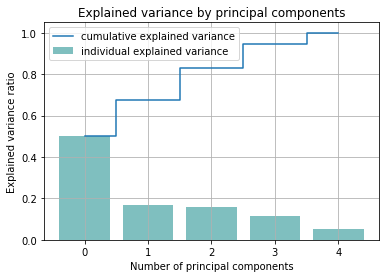

In [50]:
#Plotting the variance explained ratio and the cumulative variance
plt.bar(np.arange(5), pca.explained_variance_ratio_, alpha=0.5, color = 'teal', align='center',label='individual explained variance')
plt.step(np.arange(5), np.cumsum(pca.explained_variance_ratio_), where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Number of principal components')
plt.grid(True)
plt.legend(loc='best')
plt.title('Explained variance by principal components')
plt.show()

In [51]:
#Determining the effect that different number of PCA components have on the SVC model accuracy following feature selection
def plotvector(X_train, y_train, X_test, y_test):
    results = []
    
    for i in range(1, 6):
        pipe_svc = Pipeline([('scl',StandardScaler()),
                     ('pca',PCA(n_components = i)),
                     ('clf',SVC(probability=True, verbose = False))])
        
        pipe_svc.fit(X_train, y_train)
        results.append([i, pipe_svc.score(X_test, y_test)])
 
    return np.array(results)

PCA_accuracy =  plotvector(X_train, y_train, X_test, y_test)
PCA_accuracy

array([[1.        , 0.75595238],
       [2.        , 0.75595238],
       [3.        , 0.75      ],
       [4.        , 0.75      ],
       [5.        , 0.75      ]])

Text(0.5, 1.0, 'Accuracy with increasing principal component')

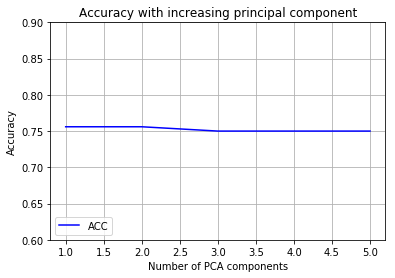

In [52]:
#Plotting the accuracy of the model with different number of PCA components
plt.plot(PCA_accuracy[:,0], PCA_accuracy[:,1], color='b', label='ACC')
plt.legend(loc=3)
plt.ylim(0.6, 0.9)
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('Number of PCA components')
plt.title("Accuracy with increasing principal component")

# Optimisation of the Support Vector Classifier

In [61]:
pipelines_SVC = []

In [62]:
#Put together the Support Vector Classifier Pipeline
pipe_svc = Pipeline([('scl',StandardScaler()),
                     ('pca',PCA(n_components = 2)),
                     ('clf',SVC(probability=True, verbose = False))])

#Fitting the pipeline to the training data
pipe_svc.fit(X_train, y_train)

scores = cross_val_score(estimator=pipe_svc, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0,scoring='accuracy')
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Model Test Accuracy: %f' % pipe_svc.score(X_test, y_test))

pipelines_SVC.append(( 'SVM_pipeline_PCA', pipe_svc))

--> Model Training Accuracy: 0.824 +/- 0.048
--> Model Test Accuracy: 0.755952


In [63]:
#Put together the Support Vector Classifier Pipeline without PCA
pipe_svc_no_PCA = Pipeline([('scl',StandardScaler()),
                            ('clf',SVC(probability=True, verbose = False))])

#Fitting the pipeline to the training data
pipe_svc_no_PCA.fit(X_train, y_train)

scores = cross_val_score(estimator=pipe_svc_no_PCA, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0, scoring = 'accuracy')

print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Model Test Accuracy: %f' % pipe_svc.score(X_test, y_test))
pipelines_SVC.append(('SVM_pipeline_no_PCA', pipe_svc_no_PCA))

--> Model Training Accuracy: 0.827 +/- 0.045
--> Model Test Accuracy: 0.755952


Tuning hyper-parameters for accuracy

Best score with tuned parameters uring GridSearchCV:  0.8278443113772455

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 0.01, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}

Grid scores on development set:

0.512 (+/-0.007) for {'clf__C': 0.0001, 'clf__kernel': 'linear'}
0.822 (+/-0.087) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.816 (+/-0.087) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.819 (+/-0.088) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.819 (+/-0.088) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.819 (+/-0.088) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.819 (+/-0.088) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.512 (+/-0.007) for {'clf__C': 0.0001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}
0.512 (+/-0.007) for {'clf__C': 0.0001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.512 (+/-0.007) for {'clf__C': 0.0001, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
0.512 (+/-0.007) for {'clf__C': 0.000

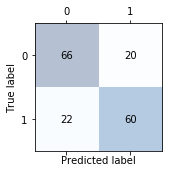

______________________________________________________________________________


Tuning hyper-parameters for precision

Best score with tuned parameters uring GridSearchCV:  0.8100123745715576

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 0.1, 'clf__gamma': 10.0, 'clf__kernel': 'rbf'}

Grid scores on development set:

0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__kernel': 'linear'}
0.782 (+/-0.096) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.773 (+/-0.095) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.774 (+/-0.097) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.774 (+/-0.097) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.774 (+/-0.097) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.774 (+/-0.097) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.000

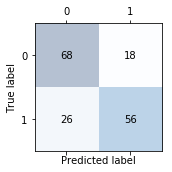

______________________________________________________________________________


Tuning hyper-parameters for recall

Best score with tuned parameters uring GridSearchCV:  0.8925416213028488

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 0.1, 'clf__kernel': 'linear'}

Grid scores on development set:

0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__kernel': 'linear'}
0.883 (+/-0.120) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.886 (+/-0.132) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.893 (+/-0.124) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.893 (+/-0.124) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.893 (+/-0.124) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.893 (+/-0.124) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.0

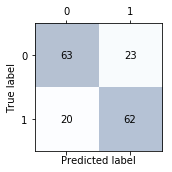

______________________________________________________________________________


Tuning hyper-parameters for f1

Best score with tuned parameters uring GridSearchCV:  0.8318717460851921

Best parameters set found on development set using GridSearchCV: 
 {'clf__C': 0.01, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}

Grid scores on development set:

0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__kernel': 'linear'}
0.829 (+/-0.086) for {'clf__C': 0.001, 'clf__kernel': 'linear'}
0.824 (+/-0.086) for {'clf__C': 0.01, 'clf__kernel': 'linear'}
0.828 (+/-0.085) for {'clf__C': 0.1, 'clf__kernel': 'linear'}
0.828 (+/-0.085) for {'clf__C': 1.0, 'clf__kernel': 'linear'}
0.828 (+/-0.085) for {'clf__C': 10.0, 'clf__kernel': 'linear'}
0.828 (+/-0.085) for {'clf__C': 100.0, 'clf__kernel': 'linear'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.0001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
0.000 (+/-0.000) for {'clf__C': 0.0001, 'clf

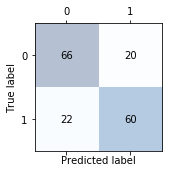

______________________________________________________________________________




In [64]:
#Using Gridsearch to find the most optimal hyperparameters for SVM Classifier

#Specifying parameter values:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf'] }]

#Specifying metrics for evaluation
scores =['accuracy',
        'precision',
         'recall',
          'f1']

#Performing GridSearchCV, optimising for the different evalutation metrics
for score in scores:
    print("Tuning hyper-parameters for %s" % score)
    print()

    gs = GridSearchCV(estimator=pipe_svc_no_PCA,
                  param_grid=param_grid,
                  cv=10,
                  n_jobs=1, 
                  scoring= score)
    
    gs.fit(X_train,y_train)
    
    print('Best score with tuned parameters uring GridSearchCV: ', gs.best_score_)
    print()
    print('Best parameters set found on development set using GridSearchCV: \n',gs.best_params_)

    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    
    clf= gs.best_estimator_

#Using cross validation to determine the final scores
    clf.fit(X_train, y_train)
    scores = cross_val_score(estimator=clf,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1, scoring = score )
    
    print('--> Final Model Training score using Cross Validation: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
    print()
    print('--> Final score on Test set: %.5f' % clf.score(X_test,y_test))

    y_true, y_pred = y_test, clf.predict(X_test)
   
    print()
    print("Confusion matrix:")
    print()
    print(confusion_matrix(y_true, y_pred))
    confmat = confusion_matrix(y_true, y_pred)
    print()
    print("Detailed classification report:")
    print()
    print(classification_report(y_true, y_pred))
    print()
    
    pipelines_SVC.append((f"Tuned_SVM_{score.strip('')}", clf))
    
    
#Plotting the confusion matrix
    print("Confusion matrix:")
    print()
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()
    
    print("______________________________________________________________________________")
    print()
    print()


In [ ]:
pipelines_SVC

[('SVM_pipeline_PCA', Pipeline(memory=None,
       steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False))])),
 ('SVM_pipeline_no_PCA', Pipeline(memory=None,
       steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False))])),
 ('Tuned_SVM_accuracy', Pipeline(memory=None,
       steps=[('scl', StandardScaler(copy=True, with_mean=True, 

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in pipelines_SVC:
    cv_results = cross_val_score(model, X_train, y_train, cv=10,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM_pipeline_PCA: 0.823588 (0.047689)
SVM_pipeline_no_PCA: 0.826574 (0.044586)
Tuned_SVM_accuracy: 0.828044 (0.044323)
Tuned_SVM_precision: 0.820625 (0.047589)
Tuned_SVM_recall: 0.819133 (0.043884)
Tuned_SVM_f1: 0.828044 (0.044323)


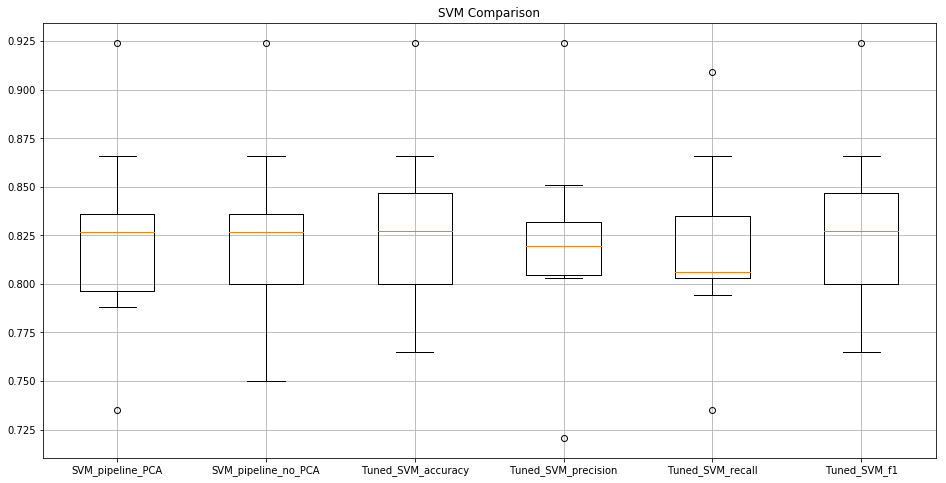

In [ ]:
# Compare Algorithms
fig= plt.figure(figsize=(16, 8))
#fig.suptitle( 'SVM Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.title('SVM Comparison')
#plt.xticks(['Scaled_SVM_pipeline','Scaled_SVM_pipeline_no_PCA','Tuned_SVM_acc','Tuned_SVM_pre',
        #'Tuned_SVM_re','Tuned_SVM_f1','Tuned_SVM_auc'])
plt.grid(True) 
ax.set_xticklabels(names)
plt.show()

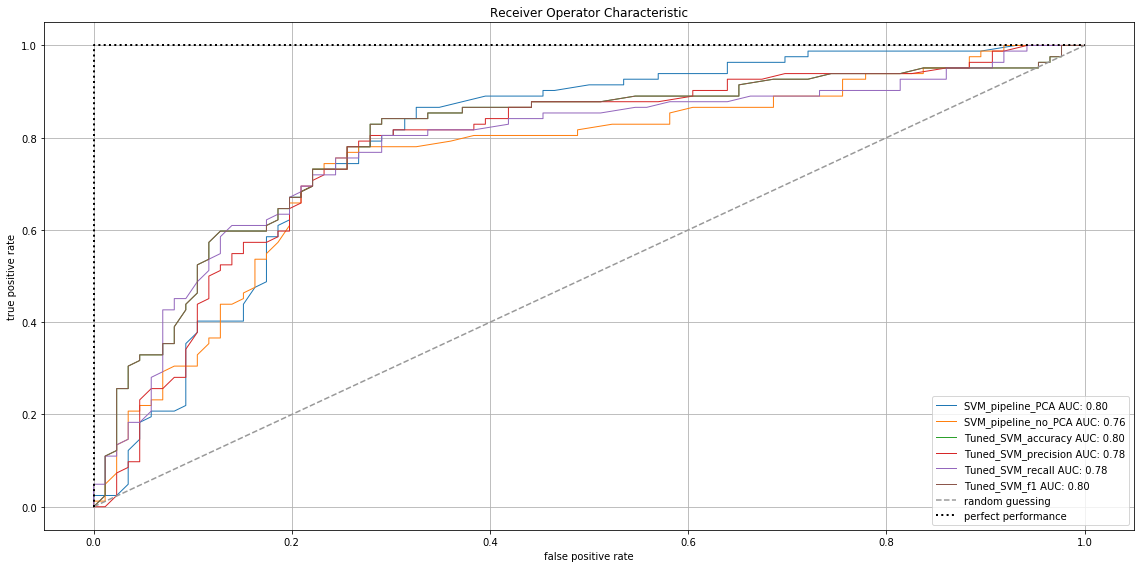

In [ ]:
#Ploting the ROC curves for the different SVCs
fig = plt.figure(figsize=(16, 8))
all_tpr = []

for name,model in pipelines_SVC:
      
    model.fit(X_train, y_train)
    
    probas = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(True)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Optmimising the Multi-layer Perceptron model

In [54]:
pipelines_MLP = []

In [55]:
#Determining the effect that different number of PCA components have on the SVC model accuracy following feature selection
def plotvector(X_train, y_train, X_test, y_test):
    results = []
    
    for i in range(1, 6):
        pipe_mlp = Pipeline([('scl',StandardScaler()),
                     ('pca',PCA(n_components = i)),
                     ('clf',MLPClassifier(max_iter=150, tol=1e-4, random_state=1))])
        
        pipe_mlp.fit(X_train, y_train)
        results.append([i, pipe_mlp.score(X_test, y_test)])
 
    return np.array(results)

PCA_accuracy =  plotvector(X_train, y_train, X_test, y_test)
PCA_accuracy

array([[1.        , 0.75595238],
       [2.        , 0.75      ],
       [3.        , 0.75      ],
       [4.        , 0.75      ],
       [5.        , 0.75      ]])

Text(0.5, 1.0, 'Accuracy with increasing principal component')

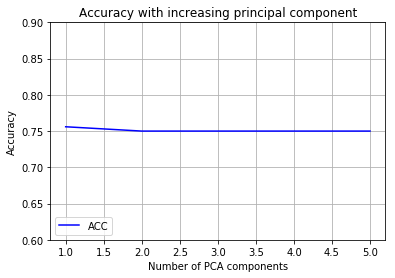

In [56]:
#Plotting the accuracy of the model with different number of PCA components
plt.plot(PCA_accuracy[:,0], PCA_accuracy[:,1], color='b', label='ACC')
plt.legend(loc=3)
plt.ylim(0.6, 0.9)
plt.grid(True)
plt.ylabel('Accuracy')
plt.xlabel('Number of PCA components')
plt.title("Accuracy with increasing principal component")

In [57]:
#Put together the Support Vector Classifier Pipeline
pipe_mlp = Pipeline([('scl',StandardScaler()),
                     ('pca',PCA(n_components = 1)),
                     ('clf',MLPClassifier(max_iter=150, tol=1e-4, random_state=1))])

#Fitting the pipeline to the training data
pipe_mlp.fit(X_train, y_train)

scores = cross_val_score(estimator=pipe_mlp, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0,scoring='accuracy')
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Model Test Accuracy: %f' % pipe_mlp.score(X_test, y_test))

--> Model Training Accuracy: 0.828 +/- 0.042
--> Model Test Accuracy: 0.755952


In [58]:
#Put together the Support Vector Classifier Pipeline
pipe_mlp_no_PCA = Pipeline([('scl',StandardScaler()),
                     ('clf',MLPClassifier(max_iter=150, tol=1e-4, random_state=1))])

#Fitting the pipeline to the training data
pipe_mlp_no_PCA.fit(X_train, y_train)

scores = cross_val_score(estimator=pipe_mlp_no_PCA , X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0,scoring='accuracy')
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
print('--> Model Test Accuracy: %f' % pipe_mlp_no_PCA.score(X_test, y_test))

--> Model Training Accuracy: 0.819 +/- 0.050
--> Model Test Accuracy: 0.750000


# Tuning hyper-parameters for accuracy

--> Tuned Parameters Best Score:  0.8278443113772455

--> Best parameters set found on development set: 
 {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'adam'}
--> Final Model Training Accuracy score: 0.822 +/- 0.048

--> Final Accuracy score on Test set: 0.75000

Confusion matrix:
[[67 19]
 [23 59]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        86
           1       0.76      0.72      0.74        82

   micro avg       0.75      0.75      0.75       168
   macro avg       0.75      0.75      0.75       168
weighted avg       0.75      0.75      0.75       168




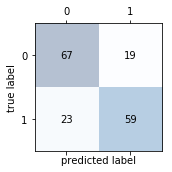

# Tuning hyper-parameters for precision

--> Tuned Parameters Best Score:  0.8070316691899613

--> Best parameters set found on development set: 
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 150, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
--> Final Model Training Accuracy score: 0.819 +/- 0.059

--> Final Accuracy score on Test set: 0.74405

Confusion matrix:
[[68 18]
 [25 57]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        86
           1       0.76      0.70      0.73        82

   micro avg       0.74      0.74      0.74       168
   macro avg       0.75      0.74      0.74       168
weighted avg       0.75      0.74      0.74       168




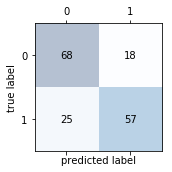

# Tuning hyper-parameters for recall

--> Tuned Parameters Best Score:  0.9387232527951093

--> Best parameters set found on development set: 
 {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
--> Final Model Training Accuracy score: 0.715 +/- 0.085

--> Final Accuracy score on Test set: 0.70833

Confusion matrix:
[[55 31]
 [18 64]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        86
           1       0.67      0.78      0.72        82

   micro avg       0.71      0.71      0.71       168
   macro avg       0.71      0.71      0.71       168
weighted avg       0.71      0.71      0.71       168




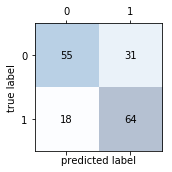

# Tuning hyper-parameters for f1

--> Tuned Parameters Best Score:  0.8325019083528926

--> Best parameters set found on development set: 
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (75, 75, 75), 'learning_rate': 'constant', 'learning_rate_init': 0.0001, 'solver': 'sgd'}
--> Final Model Training Accuracy score: 0.825 +/- 0.042

--> Final Accuracy score on Test set: 0.75000

Confusion matrix:
[[67 19]
 [23 59]]

Detailed classification report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        86
           1       0.76      0.72      0.74        82

   micro avg       0.75      0.75      0.75       168
   macro avg       0.75      0.75      0.75       168
weighted avg       0.75      0.75      0.75       168




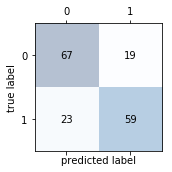

______________________________________________________________________________




In [60]:
import warnings
warnings.filterwarnings("ignore")
mlp = MLPClassifier(max_iter=150, tol=1e-4, random_state=1)
#Tuning hyperparameters, specifing a range of values for the GridSearch to select the optimal hyperparamater values
parameter_space = {
    'hidden_layer_sizes': [(50,50,50),(75,75,75),(50,100,50), (100,100,100), (100,50,100),(100,150,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
     'learning_rate_init':[0.0001],
    'alpha': [0.0001, 0.001, 0.01, 0.05, 1],
    'learning_rate': ['constant','adaptive']    
}

scores = ['accuracy',
         'precision', 
         'recall',
         'f1']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

   #Using GridSearch to optimise for Accuracy
    gs_mlp =GridSearchCV(mlp, parameter_space, n_jobs=1,cv=5,scoring=score)

#Fitting Gridsearch to the training data
    gs_mlp = gs_mlp.fit(X_train, y_train)
    
    print('--> Tuned Parameters Best Score: ',gs_mlp.best_score_)
    print()
    print('--> Best parameters set found on development set: \n',gs_mlp.best_params_)

   # print()
   # print("Grid scores on development set:")
   # print()
    #means = gs_mlp.cv_results_['mean_test_score']
    #stds = gs_mlp.cv_results_['std_test_score']
    #for mean, std, params in zip(means, stds, gs_mlp.cv_results_['params']):
        #print("%0.3f (+/-%0.03f) for %r"
              #% (mean, std * 2, params))
    #print()
    
    clf_mlp= gs_mlp.best_estimator_

#Get Final Scores
    clf_mlp.fit(X_train, y_train)
    scores = cross_val_score(estimator= clf_mlp,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
    
    print('--> Final Model Training Accuracy score: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))
    print()
    print('--> Final Accuracy score on Test set: %.5f' %  clf_mlp.score(X_test,y_test))

    y_true, y_pred = y_test,  clf_mlp.predict(X_test)
    
    pipelines_MLP.append((f"Tuned_MLP_{score.strip('')}",clf_mlp))
    
    
 
    confmat = confusion_matrix(y_true, y_pred)
   
    print()
    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()
    print("Detailed classification report:")
    print(classification_report(y_true, y_pred))
    print()
    
    
    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

print("______________________________________________________________________________")
print()
print()

[0.82951154 0.8266843  0.82535458 0.81936844 0.80938589 0.76464292
 0.76185934]
[0.83109652 0.81920079 0.81761779 0.81770892 0.80124445 0.73984622
 0.73776705]


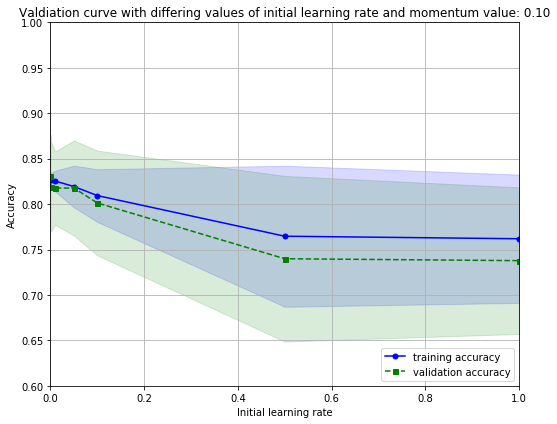

[0.82535568 0.82817932 0.82369538 0.82302788 0.80406337 0.73295348
 0.73453776]
[0.82060287 0.81770759 0.80866257 0.810199   0.79964017 0.71515285
 0.73672613]


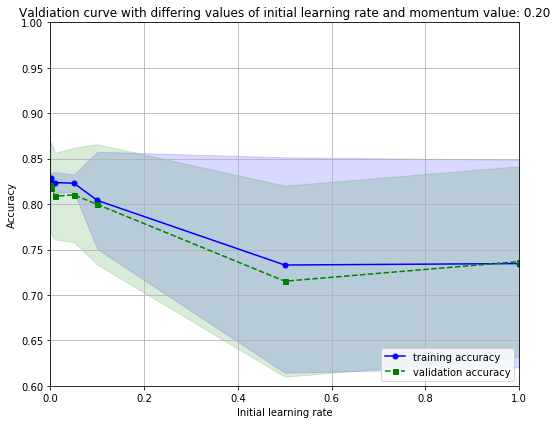

[0.82751681 0.83117322 0.82469344 0.81122669 0.80010098 0.75385994
 0.71065287]
[0.83254516 0.82067005 0.81320736 0.79828066 0.797988   0.74699431
 0.70307686]


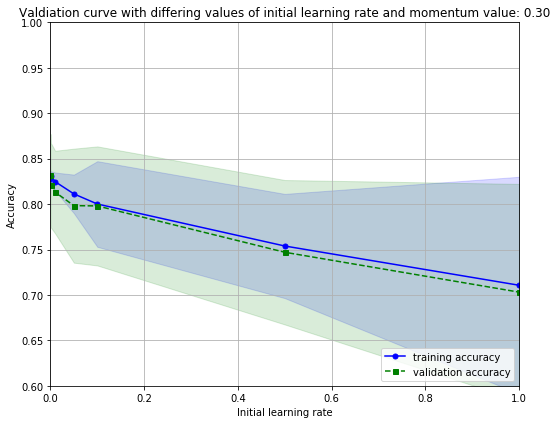

[0.8251879  0.82801376 0.82286454 0.80857662 0.79145123 0.77432141
 0.78413479]
[0.82358861 0.82365579 0.81160375 0.78758613 0.76648708 0.75906829
 0.77849522]


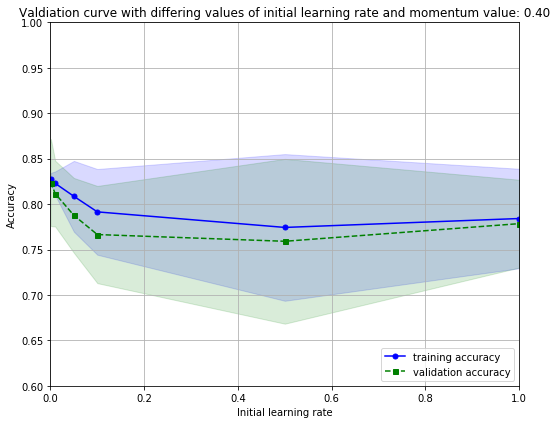

[0.82651487 0.82818098 0.82236426 0.81189612 0.78462042 0.78909883
 0.72396181]
[0.81759584 0.81770759 0.81764107 0.79362413 0.78034826 0.79355761
 0.71673584]


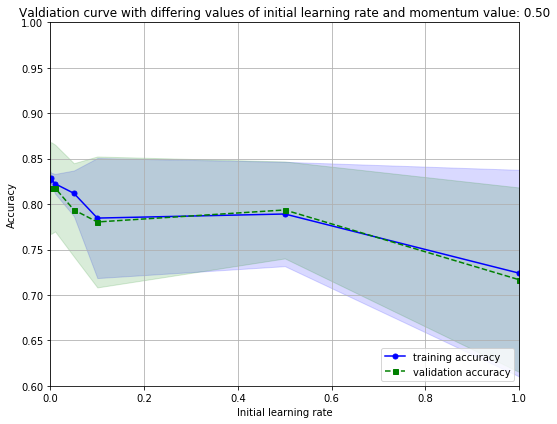

[0.82485374 0.83000905 0.82701958 0.82618515 0.80308023 0.73306708
 0.76468077]
[0.82955942 0.82367773 0.82060353 0.81169287 0.81164831 0.72320284
 0.76352462]


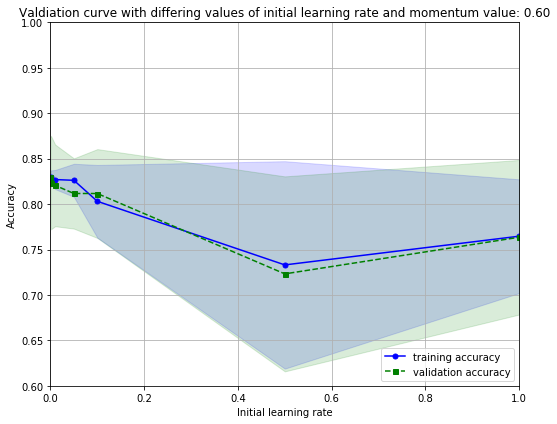

[0.82784515 0.82618264 0.82552346 0.8127112  0.81088202 0.78495043
 0.76316171]
[0.83109652 0.8161931  0.82365579 0.80717136 0.78928153 0.75913747
 0.7486212 ]


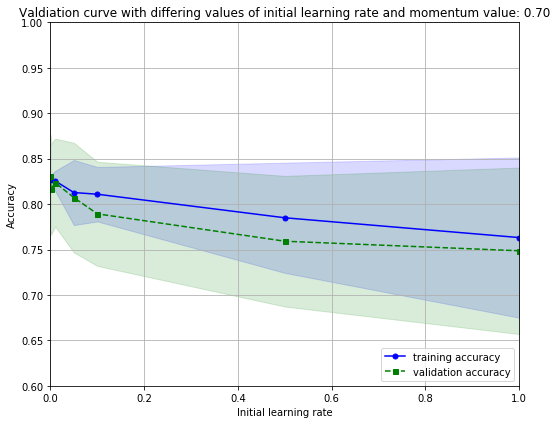

[0.82551792 0.82652013 0.82219124 0.76065787 0.81189528 0.78746617
 0.74487684]
[0.82512571 0.81020034 0.79672227 0.75024876 0.79961689 0.7724559
 0.74097893]


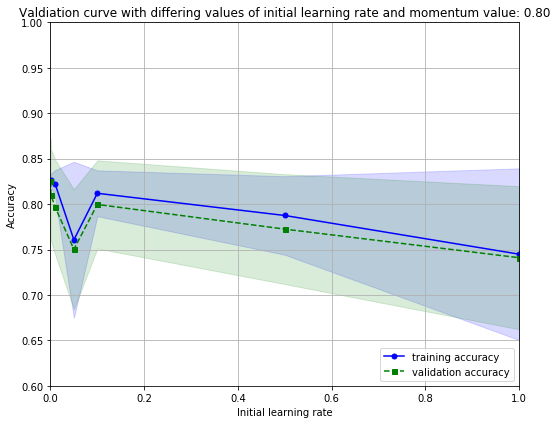

[0.8263482  0.82784764 0.82468902 0.81920038 0.79526436 0.77495076
 0.77462129]
[0.82060353 0.82069332 0.80565555 0.80266848 0.79208636 0.76225956
 0.77557932]


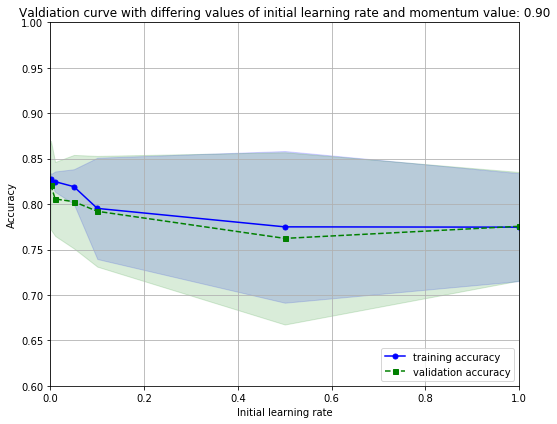

[0.82618347 0.82601598 0.82286288 0.82186814 0.82203536 0.78029485
 0.79642742]
[0.82064876 0.81621505 0.82365579 0.8072146  0.80881954 0.75016096
 0.77704925]


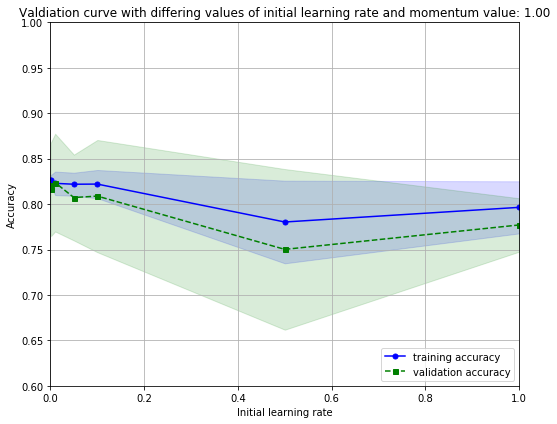

In [65]:
#Using validation curve to determine initial learning rate and momentum values that give the best results for accuracy
from sklearn.model_selection import validation_curve


for i in np.linspace(0.1,1,10):
#finding the optimal value of initial learning rate using validation curve
    param_range = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1]
    train_scores, test_scores = validation_curve(
                estimator=MLPClassifier(momentum = i), 
                X=X_train, 
                y=y_train, 
                param_name='learning_rate_init', 
                param_range =param_range, cv= 10)
    


    train_mean = np.mean(train_scores, axis=1)
    print(train_mean)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    print(test_mean)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8,6))
    plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

    plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

    plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

#plotting the C paramater values agains the relevant accuracy values
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel('Initial learning rate')
    plt.ylabel('Accuracy')
    plt.ylim([0.6, 1.0])
    plt.xlim([0, 1])
    plt.title('Valdiation curve with differing values of initial learning rate and momentum value: %.2f' %(i))
    plt.tight_layout()
    plt.show()

In [66]:
#Rerunninung the MLP with the initial learning rate  and momentum values that gave the best accuracy
pipe_MLP_2 = Pipeline([('scl', StandardScaler()), #not needed because most frequent class label used for prediction only
                     ('MLP_2',MLPClassifier(hidden_layer_sizes=(50,50,50), activation='tanh', solver='adam', alpha=1,
                                            batch_size='auto', learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, 
                                            max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False,momentum=0.3))])

#Fit the pipeline to the training data
pipe_MLP_2.fit(X_train, y_train)   

scores = cross_val_score(estimator=pipe_MLP_2, X=X_train, y=y_train, cv=10, n_jobs=1, verbose=0)

print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % pipe_MLP_2.score(X_test,y_test))

pipelines_MLP.append(( 'Validation_curve_tuned_MLP_pipeline', pipe_MLP_2))

--> Final Model Training Accuracy: 0.824 +/- 0.048
--> Final Accuracy on Test set: 0.75000


In [67]:
pipe_MLP_2.fit(X_train, y_train)
y_pred = pipe_MLP_2.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.75
[[67 19]
 [23 59]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        86
           1       0.76      0.72      0.74        82

   micro avg       0.75      0.75      0.75       168
   macro avg       0.75      0.75      0.75       168
weighted avg       0.75      0.75      0.75       168



In [68]:
from sklearn.dummy import DummyClassifier
pipe_Dummy = Pipeline([('scl', StandardScaler()), #not needed because most frequent class label used for prediction only
                     ('clf', DummyClassifier(strategy="most_frequent"))])

pipelines_MLP.append(( 'ScaledDummy', pipe_Dummy))

In [69]:
results_mlp = []
names_mlp = []
scoring = 'accuracy'
for name, model in pipelines_MLP:
    cv_results = cross_val_score(model, X_train, y_train, cv=10,scoring=scoring)
    results_mlp.append(cv_results)
    names_mlp.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Tuned_MLP_accuracy: 0.822073 (0.048145)
Tuned_MLP_precision: 0.819064 (0.058684)
Tuned_MLP_recall: 0.714626 (0.084960)
Tuned_MLP_f1: 0.825104 (0.041781)
Validation_curve_tuned_MLP_pipeline: 0.823565 (0.048316)
ScaledDummy: 0.511987 (0.003698)


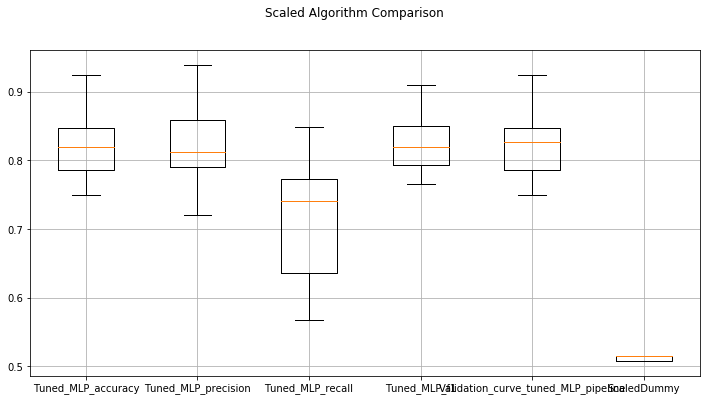

In [70]:
# Compare Algorithms
fig = plt.figure(figsize=(12, 6))
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.grid(True)
plt.boxplot(results_mlp)
ax.set_xticklabels(names_mlp)
plt.show()

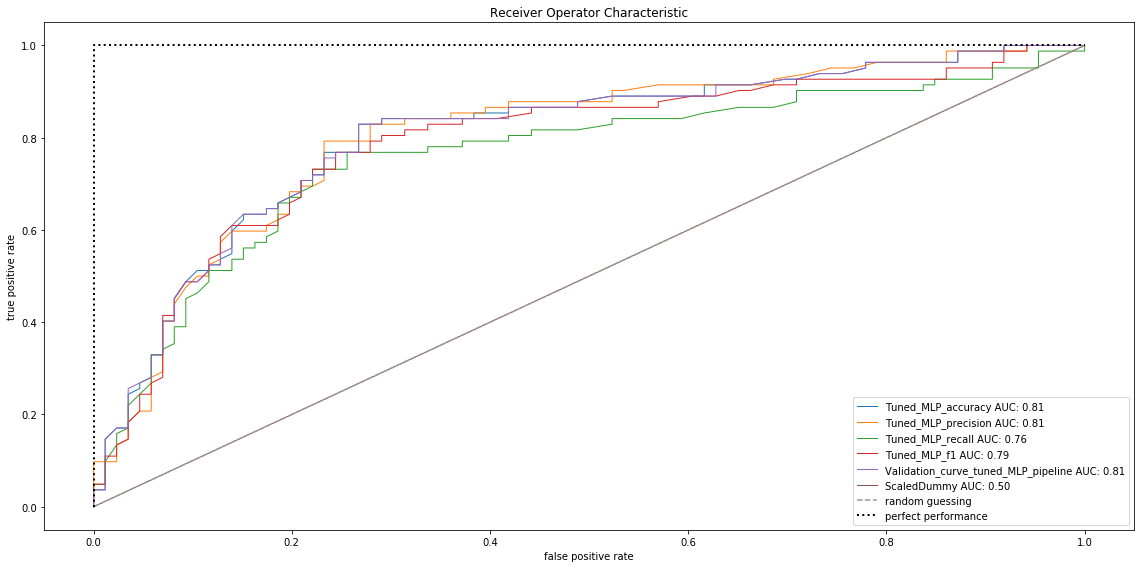

In [71]:
#Plotting the ROC curves for the differently tuned MLP classifiers
fig = plt.figure(figsize=(16, 8))
all_tpr = []

for name, model in pipelines_MLP:
      
    model.fit(X_train, y_train)
    
    probas = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [72]:
pipelines_comparison=[]

In [73]:
pipelines_comparison.append(pipelines_SVC[2])

In [74]:
pipelines_comparison.append(pipelines_MLP[4])

In [75]:
results_final = []
names_final = []
scoring = 'accuracy'
for name, model in pipelines_comparison:
    cv_results = cross_val_score(model, X_train, y_train, cv=10,scoring=scoring)
    results_final.append(cv_results)
    names_final.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Tuned_SVM_accuracy: 0.828044 (0.044323)
Validation_curve_tuned_MLP_pipeline: 0.823565 (0.048316)


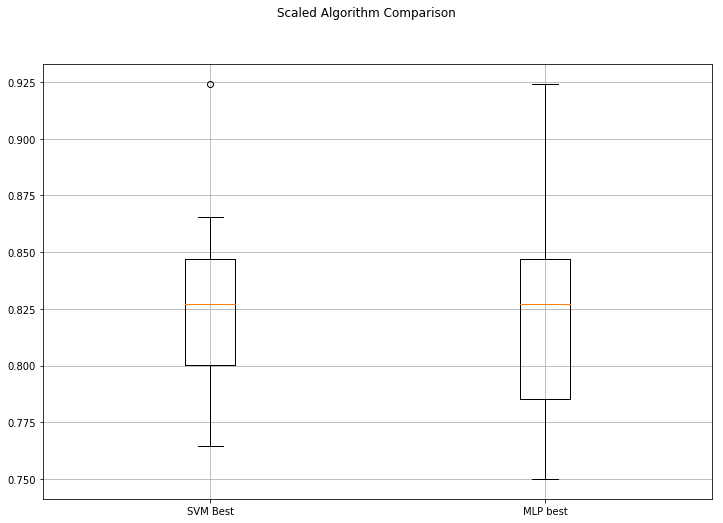

In [76]:
# Compare Algorithms
fig = plt.figure(figsize=(12,8))
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results_final)
ax.set_xticklabels(('SVM Best', 'MLP best'))
plt.grid(True)
plt.show()

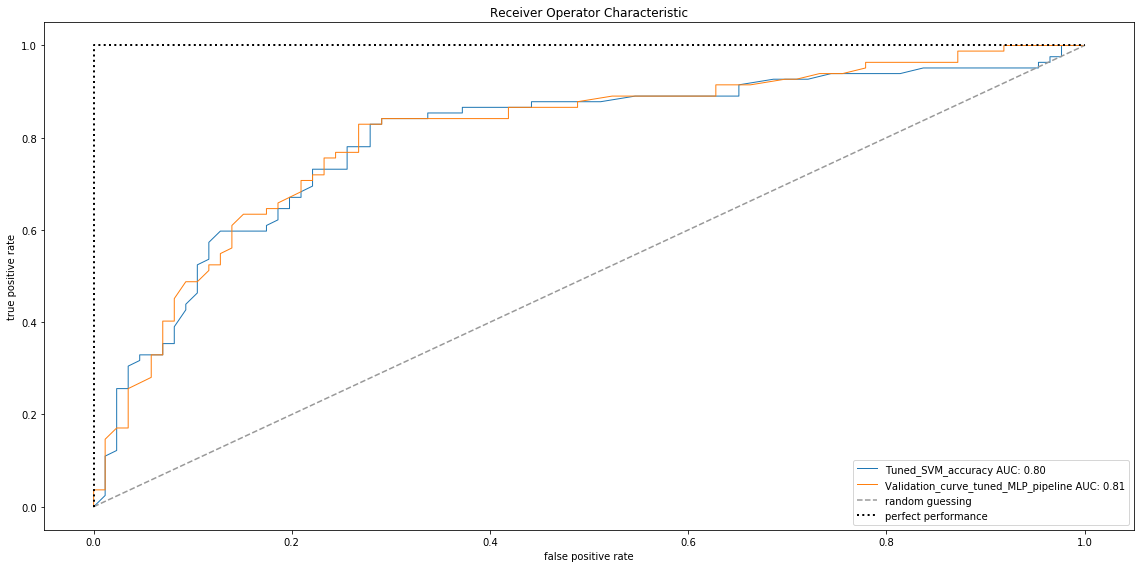

In [77]:
fig = plt.figure(figsize=(16, 8))
all_tpr = []

for name, model in pipelines_comparison:
      
    model.fit(X_train, y_train)
    
    probas = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
~